# Desafío Telecom X: Análisis y Evasión de Clientes

Bienvenido al desafío de análisis de Churn para la empresa Telecom X. El objetivo es analizar los datos de clientes, identificar patrones de evasión y preparar la información para el equipo de ciencia de datos.

**Pasos principales:**
- Cargar y explorar los datos
- Limpiar y tratar los datos
- Realizar análisis exploratorio
- Preparar conclusiones para el informe final

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de pandas para mejor visualización
display.max_columns = None

In [2]:
# Cargar los datos desde el archivo JSON
ruta_datos = 'TelecomX_Data.json'
df = pd.read_json(ruta_datos)

df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
# Información general del DataFrame
display(df.shape)
df.info()
df.isnull().sum()

(7267, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

#📌 Extracción

## 📝 Pasos del análisis y ETL

1. **Normalización de columnas anidadas**: Expandir las columnas `customer`, `phone`, `internet` y `account` para obtener un DataFrame plano.
2. **Revisión de tipos de datos y valores nulos**: Verificar los tipos de datos y la presencia de valores nulos en el DataFrame resultante.
3. **Estadísticas descriptivas y visualización**: Calcular estadísticas básicas y visualizar la distribución de la variable objetivo `Churn`.
4. **Limpieza y transformación**: Realizar limpieza de datos y preparar el dataset para el análisis predictivo.
5. **Análisis exploratorio**: Explorar relaciones y patrones relevantes para la evasión de clientes.
6. **Conclusiones**: Redactar hallazgos y recomendaciones para el informe final.

In [12]:
# Preparar variables para el modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Selección de variables independientes principales
features = []
if 'tenure' in df_flat.columns:
    features.append('tenure')
if 'SeniorCitizen' in df_flat.columns:
    features.append('SeniorCitizen')
if 'Contract' in df_flat.columns:
    # Codificar tipo de contrato
    df_flat = df_flat.copy()
    df_flat = pd.get_dummies(df_flat, columns=['Contract'], drop_first=True)
    features += [col for col in df_flat.columns if col.startswith('Contract_')]
if 'Charges.Monthly' in df_flat.columns:
    features.append('Charges.Monthly')

# Variable dependiente
X = df_flat[features]
y = df_flat['Churn'].map({'No': 0, 'Yes': 1})

# Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicciones y métricas
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

# R^2 del modelo
r2 = model.score(X_test, y_test)
print(f"R^2 (score): {r2:.3f}")

# Precisión y reporte
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC:", roc_auc_score(y_test, y_proba))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

ValueError: Input y contains NaN.

## 6️⃣ Modelado simple de Churn
Como cierre del análisis exploratorio, se construye un modelo de regresión logística simple para predecir la evasión de clientes (`Churn`) usando las variables más relevantes identificadas en el EDA.

#🔧 Transformación

In [4]:
# Expandir columnas anidadas
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Concatenar todas las columnas expandidas con las columnas principales
df_flat = pd.concat([
    df[['customerID', 'Churn']],
    customer_df,
    phone_df,
    internet_df,
    account_df
], axis=1)

df_flat.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## 1️⃣ Normalización de columnas anidadas
Las columnas `customer`, `phone`, `internet` y `account` contienen diccionarios con información relevante. Vamos a expandirlas para obtener un DataFrame plano y más fácil de analizar.

#📊 Carga y análisis

In [5]:
df_flat.info()
df_flat.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

## 2️⃣ Revisión de tipos de datos y valores nulos
Ahora revisamos los tipos de datos y la presencia de valores nulos en el DataFrame plano.

#📄Informe final

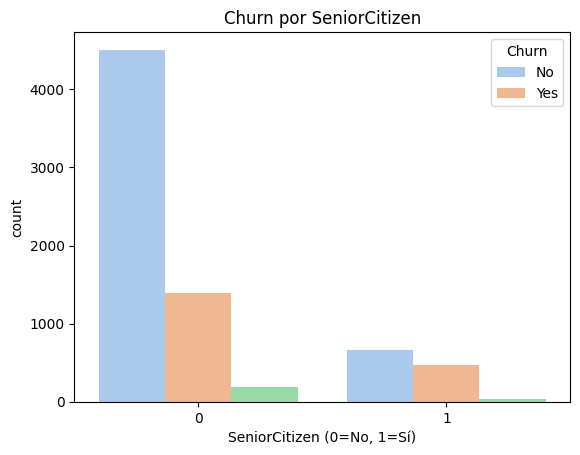

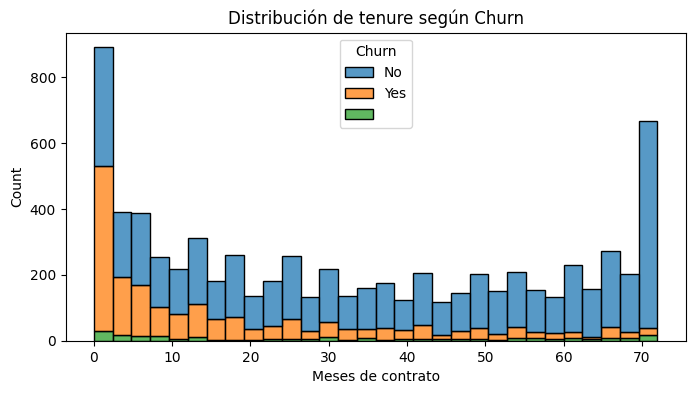

In [6]:
# Churn por SeniorCitizen
if 'SeniorCitizen' in df_flat.columns:
    sns.countplot(data=df_flat, x='SeniorCitizen', hue='Churn', palette='pastel')
    plt.title('Churn por SeniorCitizen')
    plt.xlabel('SeniorCitizen (0=No, 1=Sí)')
    plt.show()

# Distribución de tenure según Churn
if 'tenure' in df_flat.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df_flat, x='tenure', hue='Churn', multiple='stack', bins=30)
    plt.title('Distribución de tenure según Churn')
    plt.xlabel('Meses de contrato')
    plt.show()

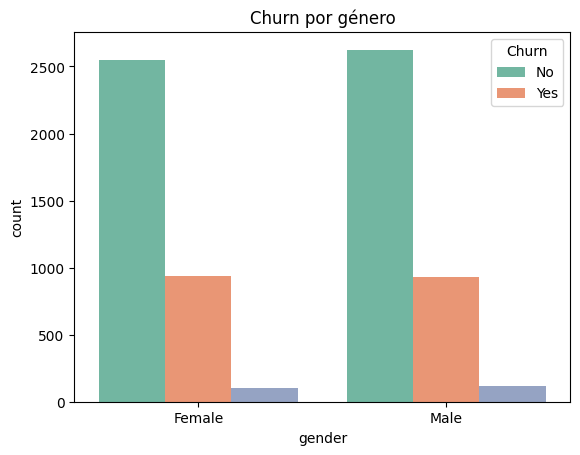

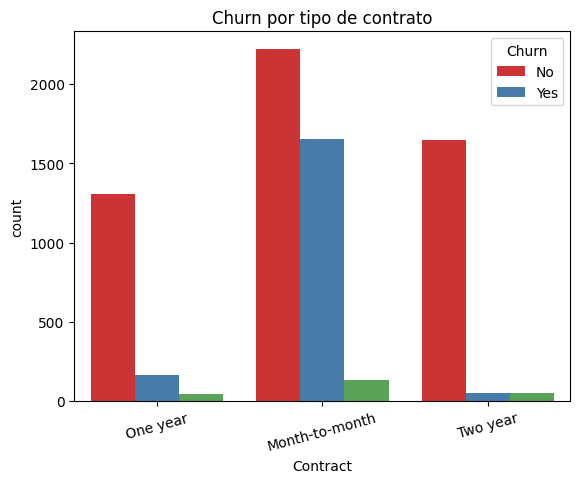

In [7]:
# Churn por género
import seaborn as sns
sns.countplot(data=df_flat, x='gender', hue='Churn', palette='Set2')
plt.title('Churn por género')
plt.show()

# Churn por tipo de contrato
if 'Contract' in df_flat.columns:
    sns.countplot(data=df_flat, x='Contract', hue='Churn', palette='Set1')
    plt.title('Churn por tipo de contrato')
    plt.xticks(rotation=15)
    plt.show()

## 5️⃣ Análisis exploratorio y visualizaciones
Exploramos las variables más relevantes para la evasión de clientes (Churn) mediante gráficos y tablas cruzadas.

In [8]:
# Ejemplo de limpieza: convertir columnas numéricas y tratar nulos
# Convertir SeniorCitizen a entero
if 'SeniorCitizen' in df_flat.columns:
    df_flat['SeniorCitizen'] = df_flat['SeniorCitizen'].astype(int)

# Convertir tenure, Charges.Monthly y Charges.Total a numérico si existen
for col in ['tenure', 'Charges.Monthly', 'Charges.Total']:
    if col in df_flat.columns:
        df_flat[col] = pd.to_numeric(df_flat[col], errors='coerce')

# Revisar valores nulos tras la conversión
df_flat.isnull().sum()

customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64

## 4️⃣ Limpieza y transformación de datos
En esta sección se identifican y corrigen inconsistencias, se convierten tipos de datos y se preparan las variables para el análisis.

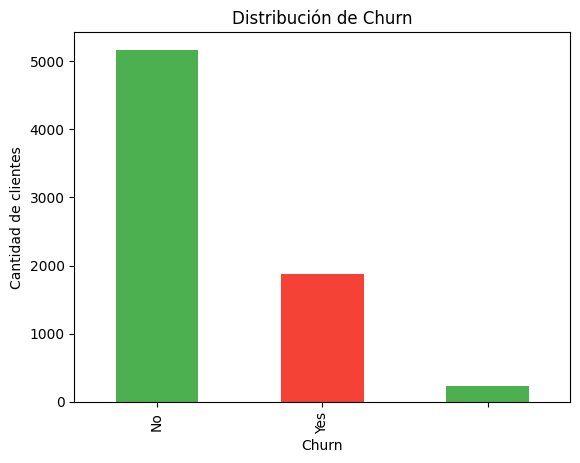

In [9]:
# Distribución de la variable objetivo
import matplotlib.pyplot as plt
df_flat['Churn'].value_counts().plot(kind='bar', color=['#4CAF50', '#F44336'])
plt.title('Distribución de Churn')
plt.xlabel('Churn')
plt.ylabel('Cantidad de clientes')
plt.show()

In [10]:
# Estadísticas básicas
df_flat.describe(include='all')

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
count,7267,7267,7267,7267.000000,7267,7267,7267.000000,7267,7267,7267,...,7267,7267,7267,7267,7267,7267,7267,7267,7267.000000,7256.000000
unique,7267,3,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,3,2,4,NaN,NaN
top,9995-HOTOH,No,Male,NaN,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN
freq,1,5174,3675,NaN,3749,5086,NaN,6560,3495,3198,...,3182,3195,3582,2896,2870,4005,4311,2445,NaN,NaN
mean,NaN,NaN,NaN,0.162653,NaN,NaN,32.346498,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,2280.634213
std,NaN,NaN,NaN,0.369074,NaN,NaN,24.571773,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,2268.632997
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,400.225000
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,1391.000000
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,3785.300000


## 3️⃣ Estadísticas descriptivas y primeras visualizaciones
Veamos algunas estadísticas básicas y la distribución de la variable objetivo `Churn`.